# Time Series Forecasting with XGBoost / GBRT

In [1]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions
import xgboost as xgb
from sklearn import preprocessing
import annualized_rv as arv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting model
from sklearn.ensemble import AdaBoostRegressor # AdaBoost model
import sklearn.ensemble as ensemble

import tensorflow as tf
from tensorflow import keras

import DataProcess

In [2]:
# reads in the historic implied vol data calculated in the dailyaverageIV notebook

aaplHistIV = pd.read_pickle('historicImpliedVolData/aapl_mean_iv_2017_2022.pkl')
googHistIV = pd.read_pickle('historicImpliedVolData/goog_mean_iv_2017_2022.pkl')
msftHistIV = pd.read_pickle('historicImpliedVolData/msft_mean_iv_2017_2022.pkl')
ndxHistIV = pd.read_pickle('historicImpliedVolData/ndx_mean_iv_2017_2022.pkl')
spyHistIV = pd.read_pickle('historicImpliedVolData/spc_mean_iv_2017_2022.pkl')




In [3]:

X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy 
X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
#reshape data for xgboost
def reshape2d(X_train,X_test):
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
    return X_train,X_test

In [4]:
def modelandeval(model,X_train, X_test, y_train, y_test,plot = False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_test = np.array(y_test)  # Ensure y_test is a numpy array for consistency
    
    DataProcess.evaluate_regression_metrics(y_test, y_pred)
    if plot == True:
        DataProcess.plot(y_test, y_pred)
    return None
    

In [5]:
#XGBoost model

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

MSE: 0.048314813813712415
RMSE: 0.21980630976774168
MAE: 0.17297259817889302
R2: 0.48002488224981044


In [6]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

MSE: 0.04063872228099391
RMSE: 0.201590481623002
MAE: 0.15771492017517583
R2: 0.5626367415022562


In [7]:
#GBRT Model
model =ensemble.GradientBoostingRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)


MSE: 0.04063896402815814
RMSE: 0.20159108122175975
MAE: 0.15343171316724552
R2: 0.5626341397637776


In [8]:
#AdaBoost Model
model = ensemble.AdaBoostRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

MSE: 0.05650594526488004
RMSE: 0.23770979210979098
MAE: 0.18869337943079903
R2: 0.3918700451588444


In [9]:
#STACKING MODEL 

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.GradientBoostingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

MSE: 0.0520340498306363
RMSE: 0.22810973199457382
MAE: 0.1764208123368343
R2: 0.43999761042180896


Epoch 1/50


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4592
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1859
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1056
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0892
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1044
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1060
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0889
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0701
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0965
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0836
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0699
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0894
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1025
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0671
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0833
Epoch 16/50
32/

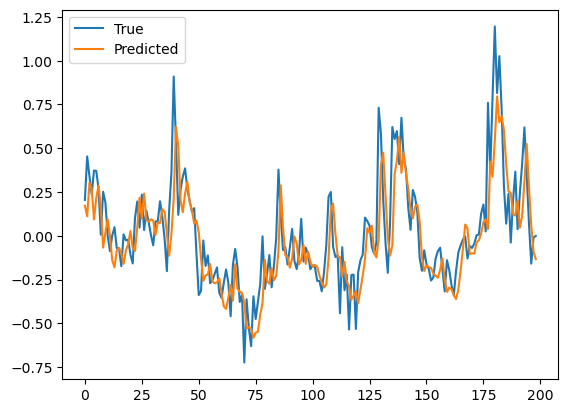

In [10]:
#LSTM Model
seq_length = 100

model = keras.models.Sequential([
    keras.layers.LSTM(seq_length, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# pass tensors instead of numpy arrays
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
y_pred = model.predict(X_test_tensor)
y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency

DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
DataProcess.plot(y_test_tensor, y_pred)

# Evaluation

# Using other data

In [12]:
# Preprocess data for other tickers

X_train_app, X_test_app, y_train_app, y_test_app = DataProcess.preprocess_data(aaplHistIV, 'AAPL', seq_length=60, splits=5, window=21)
X_train_app_reshape = X_train_app.reshape(X_train_app.shape[0],X_train_app.shape[1]*X_train_app.shape[2])
X_test_app_reshape = X_test_app.reshape(X_test_app.shape[0],X_test_app.shape[1]*X_test_app.shape[2])

X_train_goog, X_test_goog, y_train_goog, y_test_goog = DataProcess.preprocess_data(googHistIV, 'GOOG', seq_length=60, splits=5, window=21)
X_train_goog_reshape = X_train_goog.reshape(X_train_goog.shape[0],X_train_goog.shape[1]*X_train_goog.shape[2])
X_test_goog_reshape = X_test_goog.reshape(X_test_goog.shape[0],X_test_goog.shape[1]*X_test_goog.shape[2])

X_train_msft, X_test_msft, y_train_msft, y_test_msft = DataProcess.preprocess_data(msftHistIV, 'MSFT', seq_length=60, splits=5, window=21)
X_train_msft_reshape = X_train_msft.reshape(X_train_msft.shape[0],X_train_msft.shape[1]*X_train_msft.shape[2])
X_test_msft_reshape = X_test_msft.reshape(X_test_msft.shape[0],X_test_msft.shape[1]*X_test_msft.shape[2])

X_train_ndx, X_test_ndx, y_train_ndx, y_test_ndx = DataProcess.preprocess_data(ndxHistIV, 'NDX', seq_length=60, splits=5, window=21)
X_train_ndx_reshape = X_train_ndx.reshape(X_train_ndx.shape[0],X_train_ndx.shape[1]*X_train_ndx.shape[2])
X_test_ndx_reshape = X_test_ndx.reshape(X_test_ndx.shape[0],X_test_ndx.shape[1]*X_test_ndx.shape[2])

X_train_spy, X_test_spy, y_train_spy, y_test_spy = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)
X_train_spy_reshape = X_train_spy.reshape(X_train_spy.shape[0],X_train_spy.shape[1]*X_train_spy.shape[2])
X_test_spy_reshape = X_test_spy.reshape(X_test_spy.shape[0],X_test_spy.shape[1]*X_test_spy.shape[2])


In [13]:
# xgboost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train_app_reshape, X_test_app_reshape, y_train_app, y_test_app)
modelandeval(model,X_train_goog_reshape, X_test_goog_reshape, y_train_goog, y_test)
modelandeval(model,X_train_msft_reshape, X_test_msft_reshape, y_train_msft, y_test)
modelandeval(model,X_train_ndx_reshape, X_test_ndx_reshape, y_train_ndx, y_test)
modelandeval(model,X_train_spy_reshape, X_test_spy_reshape, y_train_spy, y_test_spy)


MSE: 0.08650214203335838
RMSE: 0.2941124649404686
MAE: 0.23380353827084796
R2: 0.7035416768413293
MSE: 0.22477858597077505
RMSE: 0.4741082006997717
MAE: 0.37492761413674364
R2: 0.229643554339091
MSE: 0.14327315847869873
RMSE: 0.37851440986929247
MAE: 0.3055779103361217
R2: 0.5089772424379757
MSE: 0.32128765980826357
RMSE: 0.5668224235228028
MAE: 0.46626672954097065
R2: -0.10111031518271552
MSE: 0.048314813813712415
RMSE: 0.21980630976774168
MAE: 0.17297259817889302
R2: 0.48002488224981044


In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)


In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(googHistIV, 'GOOG', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(ndxHistIV, 'NDX', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

# Time Series Forecasting with GBRT